# Engenharia de Machine Learning - XP Educação - Trabalho Prático 3 - out/2022

## Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #bibloteca para plotar graficos
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import metrics

In [62]:
# carregando o dataset
dfblood = pd.read_csv("bloodtransf1.csv")
dfdiabetes = pd.read_csv("diabetes_numeric.csv")
dfwine = pd.read_csv("wine.csv")

## Tarefa de Regressão Linear 
- Dataset: diabetes_numeric.csv

In [3]:
# Base de regressão Regressão Linear
print(dfdiabetes.shape)
dfdiabetes.head()

(43, 3)


,age,deficit,c_peptide
0,5.2,-8.1,4.8
1,8.8,-16.1,4.1
2,10.5,-0.9,5.2
3,10.6,-7.8,5.5
4,10.4,-29.0,5.0


In [4]:
dfdiabetes.isnull().sum()

age          0
deficit      0
c_peptide    0
dtype: int64

In [5]:
x1 = dfdiabetes.drop('c_peptide', axis = 1)
y1 = dfdiabetes['c_peptide']

In [6]:
# Separando treino e teste
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.37, random_state = 5762)

In [7]:
# Treinando o modelo

lr = LinearRegression()
lr.fit(x1_train, y1_train)

LinearRegression()

In [8]:
# Prediçoes para o treinamento e teste

y1_pred_train = lr.predict(x1_train)
y1_pred_test = lr.predict(x1_test)

In [9]:
# Avaliaçao dos resultados
import sklearn.metrics as metrics
from math import sqrt

MAE_train = metrics.mean_absolute_error(y1_train, y1_pred_train) 
R2_train = metrics.r2_score(y1_train, y1_pred_train) # Coeficiente de determinaçao
RMSE_train = sqrt(metrics.mean_squared_error(y1_train, y1_pred_train))

print("----- Avaliaçao do treinamento -----")
print("MAE: ", round(MAE_train,2))
print('R2: ', round(R2_train,2))
print('RMSE: ', round(RMSE_train,2))

MAE_test = metrics.mean_absolute_error(y1_test, y1_pred_test) 
R2_test = metrics.r2_score(y1_test, y1_pred_test)
RMSE_test = sqrt(metrics.mean_squared_error(y1_test, y1_pred_test))
MSE_test = metrics.mean_squared_error(y1_test, y1_pred_test)

print("")
print("----- Avaliaçao do teste -----")
print("MAE: ", round(MAE_test,2))
print('R2: ', round(R2_test,2))
print('MSE:', round(MSE_test,2))  
print('RMSE: ', round(RMSE_test,2))

----- Avaliaçao do treinamento -----
MAE:  0.41
R2:  0.52
RMSE:  0.51

----- Avaliaçao do teste -----
MAE:  0.53
R2:  0.02
MSE: 0.44
RMSE:  0.66


---

## Tarefa de Classificação com SVM
- Dataset: bloodtransf.csv

In [63]:
# Base de classificação SVM
print(dfblood.shape)
dfblood.head()

(748, 5)


,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [64]:
dfblood.tail()

,V1,V2,V3,V4,Class
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1
747,72,1,250,72,1


In [65]:
dfblood.isnull().sum()

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

In [84]:
#criando um dicionario de dados para o mapeamento
name_to_class = {
    1: 0,
    2: 1,
}

#substituindo os valores categóricos pelo mapeamento
dfblood['Class'] = dfblood['Class'].map(name_to_class)

#check
dfblood.head(5)

,V1,V2,V3,V4,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [85]:
dfblood['Class'].unique()

array([1, 0], dtype=int64)

In [86]:
dfblood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [87]:
x2 = dfblood.drop('Class', axis = 1)
y2 = dfblood['Class']

In [88]:
# Separando treino e teste
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.37, random_state = 5762)

In [89]:
# Treinando o modelo
# instanciacao e determinacao dos hiperparâmetros do SVM: tipo de kernel
svm = SVC(kernel='rbf')

# treinando o SVM
svm.fit(x2_train, y2_train)

SVC()

In [90]:
y2_pred = svm.predict(x2_test)

In [91]:
#avaliando o modelo 
print('Matriz de Confusão\n', metrics.confusion_matrix(y2_test, y2_pred)) 
print('\nAcurácia\n', metrics.accuracy_score(y2_test, y2_pred)) 
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(y2_test, y2_pred)) 
print('\nPrecision\n', metrics.precision_score(y2_test, y2_pred)) 
print('\nRecall\n', metrics.recall_score(y2_test, y2_pred)) 
print('\nF1\n', metrics.f1_score(y2_test, y2_pred)) 

print('\nAUCROC\n', metrics.roc_auc_score(y2_test, y2_pred))

Matriz de Confusão
 [[214   4]
 [ 55   4]]

Acurácia
 0.7870036101083032

Acurácia Balanceada por classe
 0.5247239931581402

Precision
 0.5

Recall
 0.06779661016949153

F1
 0.11940298507462686

AUCROC
 0.5247239931581403


In [83]:
print('\nClassification Report\n', metrics.classification_report(y2_test, y2_pred)) 


Classification Report
               precision    recall  f1-score   support

           1       0.80      0.98      0.88       218
           2       0.50      0.07      0.12        59

    accuracy                           0.79       277
   macro avg       0.65      0.52      0.50       277
weighted avg       0.73      0.79      0.72       277



---

## Tarefa de Clusterização com K-means
- Dataset: wine.csv

In [35]:
# Base de clusterização K-means
print(dfwine.shape)
dfwine.head()

(178, 14)


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
dfwine.tail()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [37]:
dfwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   class                           178 non-null    int64  
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    int64  
 6   Total_phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178 non-null    float64
 12  OD280%2FOD315_of_diluted_wines  178 

In [38]:
dfwine['class'].unique()

array([1, 2, 3], dtype=int64)

In [39]:
dfwine.isnull().sum()

class                             0
Alcohol                           0
Malic_acid                        0
Ash                               0
Alcalinity_of_ash                 0
Magnesium                         0
Total_phenols                     0
Flavanoids                        0
Nonflavanoid_phenols              0
Proanthocyanins                   0
Color_intensity                   0
Hue                               0
OD280%2FOD315_of_diluted_wines    0
Proline                           0
dtype: int64

In [40]:
#criando um dicionario de dados para o mapeamento
name_to_class = {
    1: 0,
    2: 1,
    3: 2
}

#substituindo os valores categóricos pelo mapeamento
dfwine['class'] = dfwine['class'].map(name_to_class)

#check
dfwine.head(5)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
dfwine['class'].unique()

array([0, 1, 2], dtype=int64)

In [42]:
x3 = dfwine.drop('class', axis = 1)
y3 = dfwine['class']

In [43]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.37, random_state = 5762)

In [44]:
clustering = KMeans(n_clusters = 3, random_state = 5762)
 
# treinando o modelo no conjunto de dados de treino
clusters = clustering.fit(x3_train);

In [45]:
y3_pred = clustering.predict(x3_test)


In [46]:
# Avaliando o modelo com o df1
print('Coeficiente de Silhueta\n', metrics.silhouette_score(x3_test, y3_pred)) 
print('\nDavies-Bouldin Score\n', metrics.davies_bouldin_score(x3_test, y3_pred)) 

print('\nMatriz de Contingência\n', metrics.cluster.contingency_matrix(y3_test, y3_pred)) 
print('\nMutual information\n', metrics.mutual_info_score(y3_test, y3_pred)) 

Coeficiente de Silhueta
 0.5995566852797415

Davies-Bouldin Score
 0.49625702117326337

Matriz de Contingência
 [[ 0 12  5]
 [23  0  7]
 [ 4  0 15]]

Mutual information
 0.4901210809010372


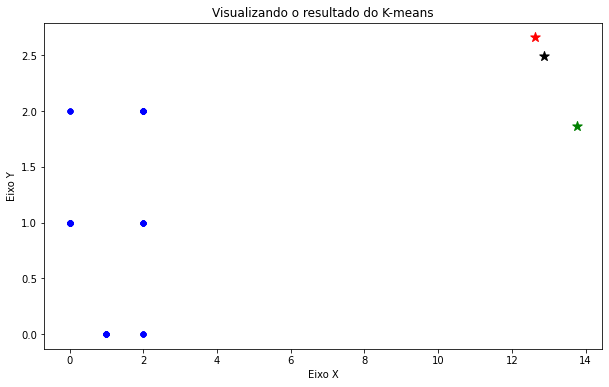

In [58]:
plt.figure(figsize = (10, 6))
plt.scatter(y3_pred, y3_test,  s = 25, color = 'blue')
plt.scatter(clusters.cluster_centers_[0][0], clusters.cluster_centers_[0][1], marker='*', s = 100, color = 'red')
plt.scatter(clusters.cluster_centers_[1][0], clusters.cluster_centers_[1][1], marker='*', s = 100, color = 'green')
plt.scatter(clusters.cluster_centers_[2][0], clusters.cluster_centers_[2][1], marker='*', s = 100, color = 'black')
plt.title('Visualizando o resultado do K-means')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y');